<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Seminars #(2-3): Exponential smoothing models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Key words:** 
    - exponential smoothing, double exponential smoothing, Holt model, Winters model, Theil-Wage model    

In [8]:
import numpy as np
from datetime import datetime, timedelta
import pylab
import matplotlib.pyplot as plt
import pandas as pd
import math
import pandas.tseries.offsets as ofs
import warnings as w
from matplotlib import gridspec
import plotly.plotly as py

from IPython.display import Image

%matplotlib inline

## Time series of sales in Retail

In [9]:
# ts = pd.read_csv('data/TimeSeries_Data10.csv', sep=',', decimal='.',parse_dates={'Timestamp': pd.to_datetime(['Dates'],dayfirst=True, errors='coerce')}, index_col='Timestamp')
ts = pd.read_csv('TimeSeries_Data10.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Dates')
ts.index.names=['Timestamp']
# ts = pd.read_csv('./data/TimeSeries_Data10.csv', sep=',', decimal='.')
ts = ts.sort_index() # sort index
ts.head()

,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
Timestamp,,,,,,,,,,,
2005-01-11,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-12,NaN,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-13,NaN,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-14,NaN,42.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-15,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Period of ts
ts[-50:-40]

,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
Timestamp,,,,,,,,,,,
2009-01-12,6.0,5.0,NaN,13.0,9.0,2.0,5.0,2.0,NaN,NaN,NaN
2009-01-13,2.0,3.0,NaN,16.0,10.0,5.0,1.0,13.0,NaN,NaN,NaN
2009-01-14,6.0,5.0,0.0,9.0,3.0,3.0,0.0,2.0,NaN,NaN,NaN
2009-01-15,8.0,18.0,11.0,6.0,5.0,11.0,1.0,2.0,NaN,NaN,NaN
2009-01-16,9.0,6.0,20.0,5.0,6.0,3.0,6.0,19.0,NaN,NaN,NaN
2009-01-17,1.0,17.0,24.0,12.0,11.0,5.0,3.0,7.0,NaN,NaN,NaN
2009-01-18,8.0,NaN,17.0,5.0,8.0,11.0,6.0,7.0,NaN,NaN,NaN
2009-01-19,2.0,NaN,2.0,14.0,2.0,9.0,9.0,1.0,NaN,NaN,NaN
2009-01-20,2.0,2.0,3.0,8.0,NaN,4.0,5.0,10.0,NaN,NaN,NaN


In [11]:
# Interval of ts 
ts.ix['2009-01-01':'2009-01-10']

/home/daniel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
Timestamp,,,,,,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,0.0,1.0,9.0,8.0,5.0,5.0,3.0,20.0,NaN,NaN,NaN
2009-01-03,7.0,6.0,6.0,14.0,12.0,3.0,2.0,1.0,NaN,NaN,NaN
2009-01-04,4.0,0.0,11.0,12.0,5.0,6.0,3.0,NaN,NaN,NaN,NaN
2009-01-05,7.0,7.0,9.0,20.0,10.0,5.0,2.0,14.0,NaN,NaN,NaN
2009-01-06,2.0,1.0,15.0,13.0,1.0,4.0,8.0,5.0,NaN,NaN,NaN
2009-01-07,1.0,3.0,8.0,12.0,2.0,2.0,7.0,5.0,NaN,NaN,NaN
2009-01-08,7.0,7.0,4.0,17.0,7.0,8.0,7.0,2.0,NaN,NaN,NaN
2009-01-09,2.0,NaN,26.0,12.0,7.0,8.0,5.0,5.0,NaN,NaN,NaN


## Plot timee series

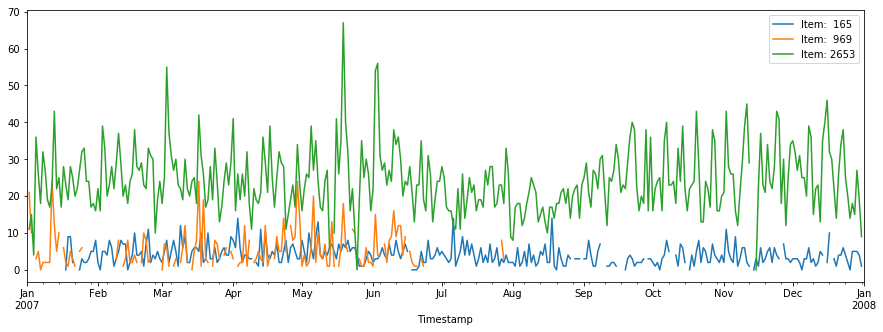

In [12]:
# fig = plt.figure()
ts.ix['2007-01-01':'2008-01-01', range(3)].plot(figsize=(15,5))
# to save the pictures
# plt.savefig('../Lecture_TS_Forecasting/pic/TS_Example.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

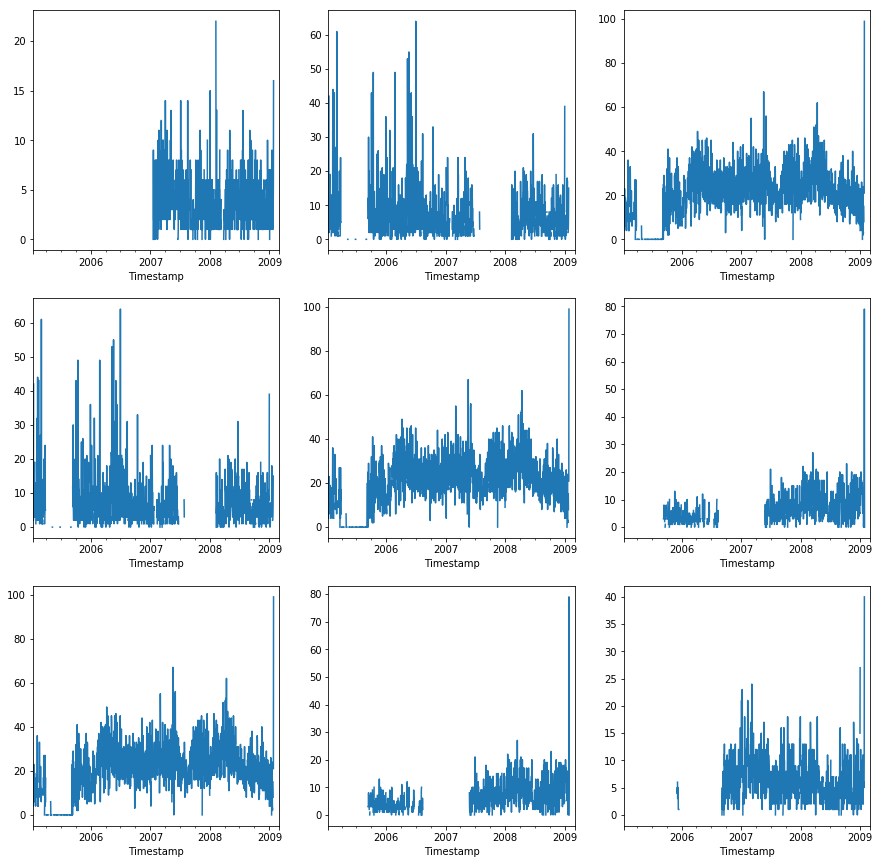

In [13]:
fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(3, 3)
for i in range(3):
    for j in range(3):
        fig.add_subplot(gs[i,j])
        ts.ix[:, i+j].plot()

**Вопросы** 
    - Which components of TS can you see?
    - Which charachteristic of TS can be metioned?
    - Is ES model appropriate to them?

## Building ES models

## Loss functions

In [14]:
# Quality functions
def qualitySSE(x,y):
    # Sum squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).sum(), (x-y)**2

def qualityMSE(x,y):
    # Mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).mean() , (x-y)**2

def qualityRMSE(x,y):
    # Root mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (((x-y)**2).mean())**(0.5) , (x-y)**2

def qualityMAE(x,y):
    # Mean absolute error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (x-y).abs().mean(), (x-y).abs()

def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = ((x-y).abs()/x).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def qualityMACAPE(x,y):
    # Mean average corrected absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def qualityMedianAE(x,y):
    # Median absolute error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y).abs()).median(), (x-y).abs()

### Simple Averaging

** Rolling window n **
       $$\frac{1}{n}\left(y_{t-n}+\dots+ {y}_t\right)$$
   
** All points in  $[t-n, t]$ has the same weight **
                                   $$w = \frac{1}{n}$$
** Other points has weight**
                                    $$w = 0$$

/home/daniel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix

/home/daniel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



NameError: name 'sns' is not defined

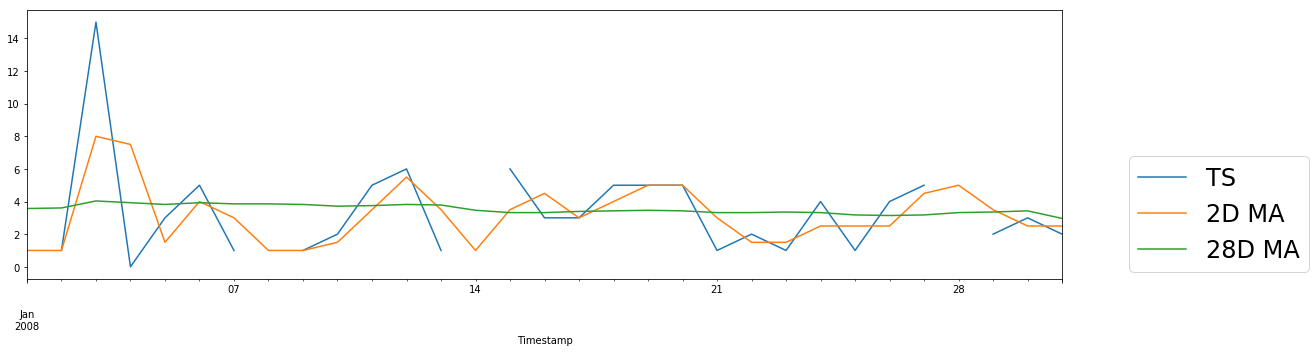

In [15]:
# Rolling (т = 2 и n=28)
# Caution: you need replace NaN
ts.ix['2008-01-01':'2008-01-31'][u'Item:  165'].plot(label='TS')
ts[u'Item:  165'].fillna(method='pad').rolling(2).mean().ix['2008-01-01':'2008-01-31'].plot(label='2D MA', figsize=(15,5))
ts[u'Item:  165'].fillna(method='pad').rolling(28).mean().ix['2008-01-01':'2008-01-31'].plot(label='28D MA', figsize=(15,5))

plt.legend(bbox_to_anchor=(1.25, .5), prop={'size':24})
plt.tight_layout()
sns.despine()

** Expanding window **
##       $$\frac{1}{t}\left(y_{1}+\dots+ {y}_t\right)$$
   
** All time points in $[1, t]$ has the same weight **
##                                   $$w = \frac{1}{t}$$   

In [ ]:
# Expanding
ts.ix['2008-01-01':'2008-01-31'][u'Item:  165'].plot(label='TS')
ts.fillna(method='pad')[u'Item:  165'].expanding().mean().ix['2008-01-01':'2008-01-31'].plot(label='Expanding', figsize=(15,5))

plt.legend(bbox_to_anchor=(1.25, .5), prop={'size':24})
plt.tight_layout()
sns.despine()

** Exponentialy diminishing weights **
  ##    $$\sum_{\tau=1}^t \alpha\cdot (1-\alpha)^{t-\tau}\cdot y_\tau$$
   
** Weight for time point in moment $\tau$  **
    
 ##                              $$w_\tau = \alpha\cdot (1-\alpha)^{t-\tau}$$  


In [ ]:
# Averaging with exponential weights
ts.ix['2008-01-01':'2008-01-31'][u'Item:  165'].plot(label='TS')
ts.fillna(method='pad')[u'Item:  165'].ewm(alpha=0.5).mean().ix['2008-01-01':'2008-01-31'].plot(label='EWMA($\\alpha=.5$)') 
ts.fillna(method='pad')[u'Item:  165'].ewm(alpha=0.1).mean().ix['2008-01-01':'2008-01-31'].plot(label='EWMA($\\alpha=.1$)', figsize=(12,5)) 

plt.legend(bbox_to_anchor=(1.25, .5), prop={'size':20})
plt.tight_layout()
sns.despine()

In [ ]:
# Compare all methods
ts.ix['2008-01-01':'2009-01-10'][u'Item:  165'].plot(label='Raw')
ts[u'Item:  165'].fillna(method='pad').rolling(28).mean().ix['2008-01-01':'2009-01-10'].plot(label='28D MA')
ts[u'Item:  165'].fillna(method='pad').expanding().mean().ix['2008-01-01':'2009-01-10'].plot(label='Expanding')
ts[u'Item:  165'].ewm(alpha=0.1).mean().ix['2008-01-01':'2009-01-10'].plot(label='EWMA($\\alpha=.1$)', figsize=(15,10)) 

plt.legend(bbox_to_anchor=(1.25, .5), prop={'size':20})
plt.tight_layout()
sns.despine()

<h1 align="center"> Simple Exponential smoothing </h1>

* Forecast model:
## $$\hat{y}_{t+1} = \alpha\cdot y_t+ (1-\alpha)\cdot \hat{y}_t$$

  
* Sum notation:
## $$\hat{y}_{t+1} = \sum_{\tau=1}^t \alpha\cdot (1-\alpha)^{t-\tau}\cdot y_\tau$$

** Question: **
 * What is the problem with this formla?
 * Hint: calculate sum of weights of time series points.

In [18]:
# Example of realization

# Simple Exponential Smoothing (ЭСС)
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter

def SimpleExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = y*(1-alpha) + alpha*x[cntr]
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

In [19]:
# Forecasting delay
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

In [20]:
# ES params
Params ={'alpha':0.1}

# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)

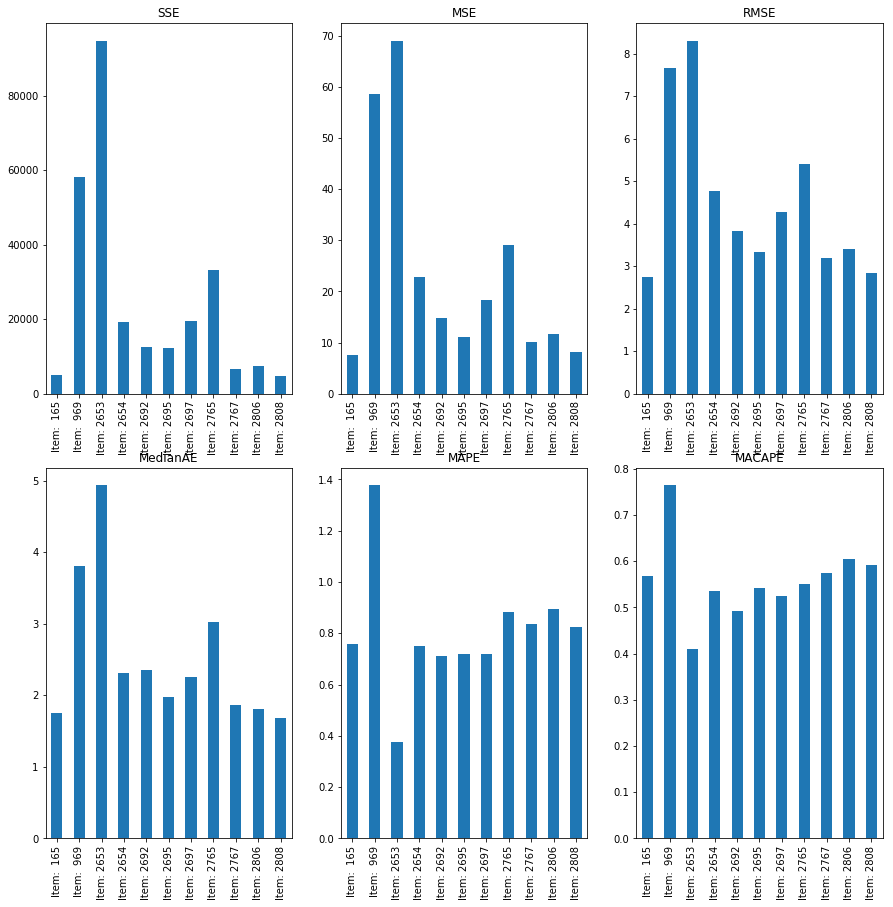

In [21]:
plt.figure(figsize=(15,15))

# Quality = [np.NaN]*len(ts.columns)
plt.subplot(2,3,1)
Quality, _ = qualitySSE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('SSE')

plt.subplot(2,3,2)
Quality, _ = qualityMSE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('MSE')

plt.subplot(2,3,3)
Quality, _ = qualityRMSE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('RMSE')

plt.subplot(2,3,4)
Quality, _ = qualityMedianAE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('MedianAE')

plt.subplot(2,3,5)
Quality, _ = qualityMAPE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('MAPE')

plt.subplot(2,3,6)
Quality, _ = qualityMACAPE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('MACAPE')

/home/daniel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix

/home/daniel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



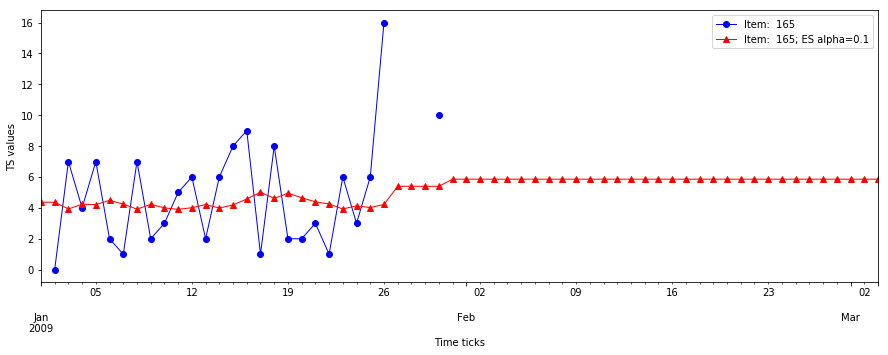

In [22]:
# show forecast alpha = 0.1
frc_ts.columns = ts.columns+'; ES alpha=0.1'
ts_num = 0 

ts[ts.columns[ts_num]].ix['2009-01-01':'2009-03-31'].plot(style='b', linewidth=1.0, marker='o')
frc_ts[frc_ts.columns[ts_num]].ix['2009-01-01':'2009-03-31'].plot(style='r-^', figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

## Repeat for h=30

In [23]:
# forecast
h = 30
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

for cntr in ts.columns:
    frc_ts[cntr] = SimpleExponentialSmoothing(ts[cntr], h, {'alpha':0.1})

/home/daniel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



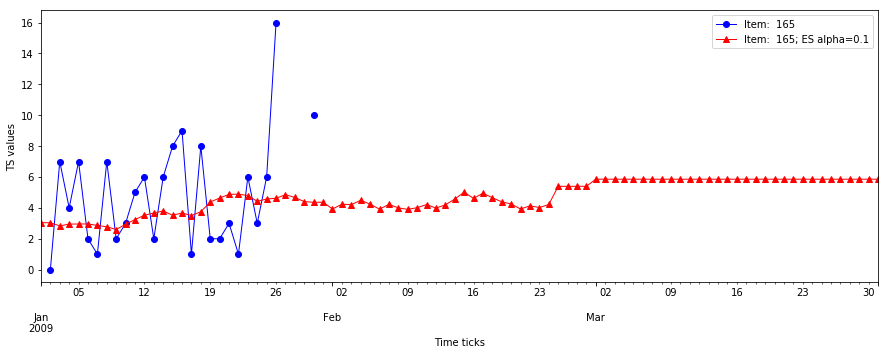

In [24]:
# show forecast h = 30, alpha = 0.1
frc_ts.columns = ts.columns+'; ES alpha=0.1'
ts_num = 0

ts[ts.columns[ts_num]].ix['2009-01-01':'2009-03-31'].plot(style='b', linewidth=1.0, marker='o')
frc_ts[frc_ts.columns[ts_num]].ix['2009-01-01':'2009-03-31'].plot(style='r-^', figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

## Search of optimal $\alpha$ 

In [25]:
#Fit parameters
h = 1
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
FRC_TS = dict()

for alpha in ALPHA:
    frc_ts = pd.DataFrame(index = ts.index.append(pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h)))
                          , columns = ts.columns)
    for cntr in ts.columns:
        frc_ts[cntr] = SimpleExponentialSmoothing(ts[cntr], h, {'alpha':alpha})
    FRC_TS['ES alpha %.2f' % alpha] = frc_ts

### Loss of forecast for all history

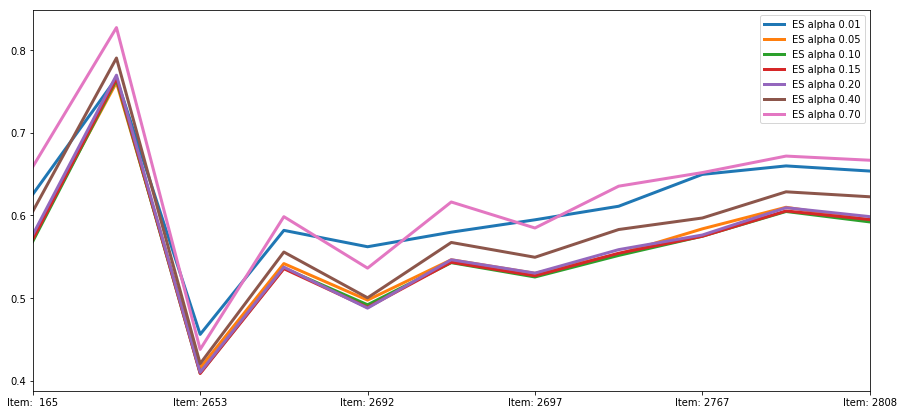

In [28]:
# compare ES parameters
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_TS.keys())

# Quality through 1500 steps
ix = range(len(ts.index))
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(ts.ix[ix], frc_ts.ix[ix])

QualityStr[sorted(QualityStr.columns)].plot(figsize = (15,7), linewidth=3.0)

* Optimal vale of $\alpha$ are about $0.1$ 

### Loss for firts time series point

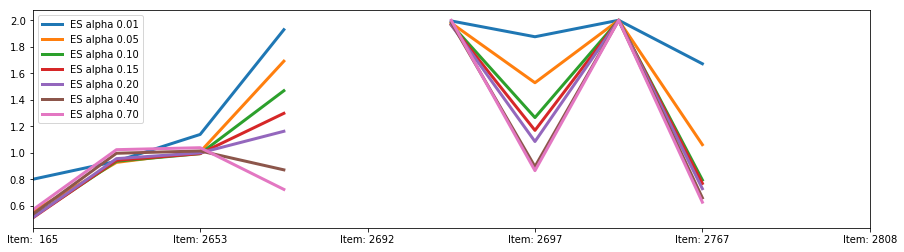

In [17]:
# Quality in first 100 steps
# ix = range(100)
for model in QualityStr.columns:
    frc_ts = FRC_TS[model]
    for ts_num in ts.columns:
        ix = pd.date_range(ts[ts_num].first_valid_index(), ts[ts_num].first_valid_index()+timedelta(150))
        QualityStr[model][ts_num],_ = qualityMACAPE(ts[ts_num].ix[ix], frc_ts[ts_num].ix[ix])

QualityStr[sorted(QualityStr.columns)].plot(figsize = (15,4), linewidth=3.0)

** Question:**
        Why is loss function  not calculated for some items?
        
        (Hint: see definition of loss function)

### Look at TS №3

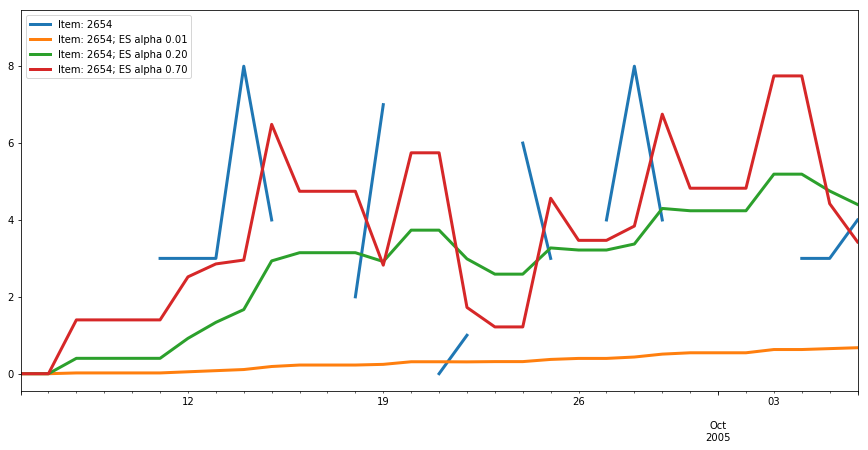

In [18]:
# ts VS forecast in first 100 steps
model_num = [0,4,6]  # [0,6], [0,4,6]
Models = sorted(FRC_TS.keys())

ts_num = 3 # 7
plot_ts = pd.DataFrame(index =ts.index)
plot_ts[ts.columns[ts_num]] = ts[ts.columns[ts_num]]
for model in model_num:
     frc_ts = FRC_TS[Models[model]]
     plot_ts[frc_ts.columns[ts_num]+'; '+Models[model]] = frc_ts[frc_ts.columns[ts_num]]

ix = pd.date_range(ts[ts.columns[ts_num]].first_valid_index()+timedelta(140), ts[ts.columns[ts_num]].first_valid_index()+timedelta(170))
plot_ts.ix[ix].plot(figsize = (15, 7), linewidth=3.0) # :250

** Wow: we need to use big $\alpha$ for first steps of ES!** 

** Question: **
   How algorithm can be modified for first steps?

### Examples of modification

* First variant: let's make $\alpha$ higher for first time point of TS

In [24]:
def InitExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

* Second variant: normalize weights of ES: $1 - (1-\alpha)^t$

In [20]:
def NormExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    
    y = 0
    norm = 0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                norm=1  # initialize when first data point comes
            norm = norm*(1-alpha)
            y = y*(1-alpha) + (alpha)*x[t]
        FORECAST[t+h] = y/(1-norm)
    return FORECAST

In [28]:
#Fit parameters
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

for alpha in ALPHA: 
    i_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
    n_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
#     Quality = [np.NaN]*len(ts)
    for cntr in ts.columns:
        i_frc_ts[cntr] = InitExponentialSmoothing(ts[cntr], h, {'alpha':alpha, 'AdaptationPeriod': 5})
        n_frc_ts[cntr] = NormExponentialSmoothing(ts[cntr], h, {'alpha':alpha})
    #Quality[cntr] = qualityRMSE(x, frc_ts[ts.columns[cntr]][:T])
    FRC_TS['IES alpha %.2f' % alpha] = i_frc_ts
    FRC_TS['NES alpha %.2f' % alpha] = n_frc_ts

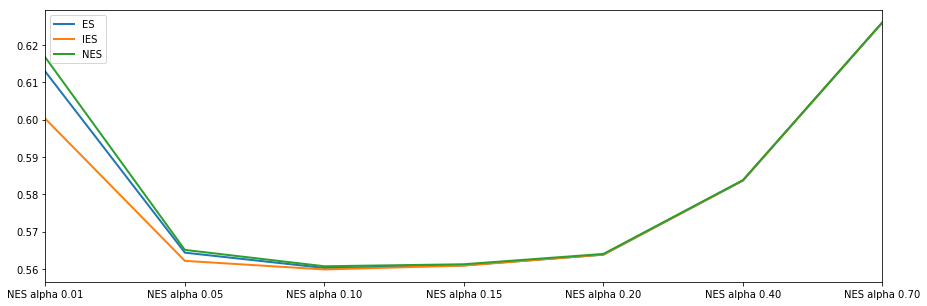

In [33]:
# compare ES methods
del QualityStr
QualityStr = pd.DataFrame(index = ts.columns, columns = sorted(FRC_TS.keys()))

for model in sorted(QualityStr.columns):
    frc_ts = FRC_TS[model]
    QualityStr[model],_ = qualityMACAPE(ts, frc_ts)

QualityStr[sorted(QualityStr.columns)[:7]].mean().plot(label='ES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[7:14]].mean().plot(label='IES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[14:]].mean().plot(label='NES', figsize = (15, 5), linewidth=2.0)
plt.legend()

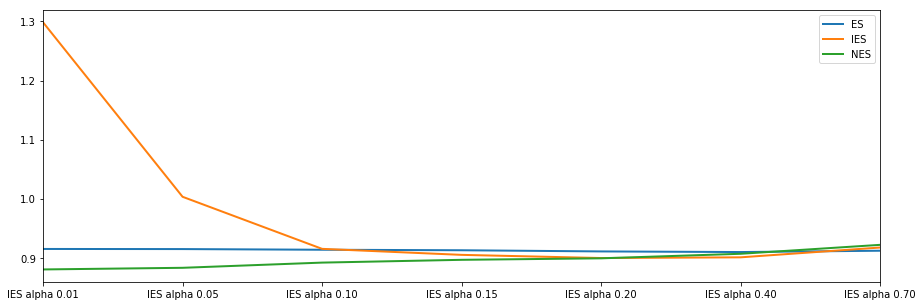

In [66]:
ix = range(100)
# compare ES methods in first 100 steps
QualityStr = pd.DataFrame(index = ts.columns, columns = sorted(FRC_TS.keys()))

for model in QualityStr.columns:
    frc_ts = FRC_TS[model]
    for ts_num in ts.columns:
        ix = pd.date_range(ts[ts_num].first_valid_index(), ts[ts_num].first_valid_index()+timedelta(50))
        QualityStr[model][ts_num],_ = qualityMACAPE(ts[ts_num].ix[ix], frc_ts[ts_num].ix[ix])

QualityStr[sorted(QualityStr.columns)[:7]].mean().plot(label='ES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[7:14]].mean().plot(label='IES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[14:21]].mean().plot(label='NES', figsize = (15, 5), linewidth=2.0)
plt.legend()

# Adaptive ES

### Tracking signal

$e_t = y_t - \hat{y}_t$

$\tilde{e}_t = \gamma e_{t-1} + (1-\gamma) \tilde{e}_{t-1}$

$\overline{e}_t = \gamma \left|e_{t-1}\right| + (1-\gamma) \overline{e}_{t-1}$

* Tracking signal

$$K_t = \frac{\tilde{e}_t}{\overline{e}_t}$$

* to do algorithm more stable 
$$\alpha_t = \left|K_{t-1}\right|$$

In [34]:
# AdaptiveExponentialSmoothing
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    AdaptivePeriod scalar> - adapation period for initialization
#    gamma<scalar in [0,1]> - parametr of cross validation

def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = np.NaN
    t0= np.NaN
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
                e1=alpha
                e2 = 1
            else:
                if (t-t0)<h:
                    e1 = gamma*(x[t]-y)+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-y)+(1-gamma)*e2
                else:
                    e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            
            if e2==0:
                K=alpha
            else:
                K=np.abs(e1/e2)

            alpha=Kt_1
            Kt_1=K

            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + (alpha)*x[t]
        FORECAST[t+h] = y
    return FORECAST

In [35]:
#Fit parameters
GAMMA = [0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005]
alpha = 0.1

for gamma in GAMMA:
    a_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
    
    for cntr in ts.columns:
        a_frc_ts[cntr] = AdaptiveExponentialSmoothing(ts[cntr], h, {'alpha':alpha, 'gamma': gamma, 'AdaptationPeriod':10})
    FRC_TS['AES gamma %.5f' % gamma] = a_frc_ts

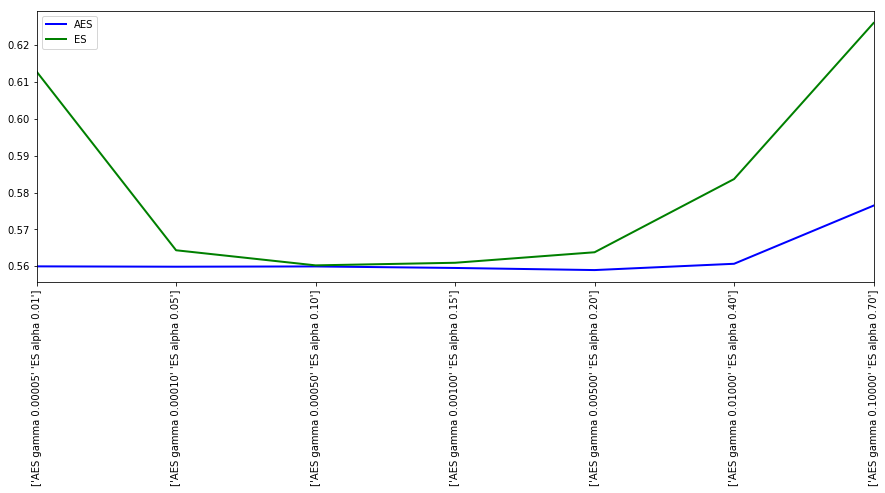

In [36]:
# compare ES methods
QualityStr = pd.DataFrame(index = ts.columns, columns = sorted(FRC_TS.keys()))

for model in sorted(QualityStr.columns):
    frc_ts = FRC_TS[model]
    QualityStr[model],_ = qualityMACAPE(ts, frc_ts)

QualityStr[sorted(QualityStr.columns)[:7]].mean().plot(color='b', label='AES', linewidth=2 )
ax = QualityStr[sorted(QualityStr.columns)[7:14]].mean().plot(color='g', label='ES', figsize = (15, 5), linewidth=2)
plt.legend()
ax.set_xticklabels(np.reshape(np.asarray(QualityStr.columns[:14]), (2, 7)).T , rotation=90)
# ax.set_xticklabels(df.C, rotation=90)

In [37]:
# Sort Quality
QualityStr[QualityStr.columns[:14]].mean().sort_values()

AES gamma 0.00500    0.558977
AES gamma 0.00100    0.559551
AES gamma 0.00010    0.559888
AES gamma 0.00050    0.559963
AES gamma 0.00005    0.559982
ES alpha 0.10        0.560255
AES gamma 0.01000    0.560685
ES alpha 0.15        0.560958
ES alpha 0.20        0.563810
ES alpha 0.05        0.564351
AES gamma 0.10000    0.576464
ES alpha 0.40        0.583668
ES alpha 0.01        0.612826
ES alpha 0.70        0.626007
dtype: float64

<h1 align="center"> Home Work 3 </h1>

## Practice

** Task #1 **  
    Instead of picture in IN[16] bild the picture of dependace MACAPE calculated in all history averaged by all TS for different values of smoothing parameter alpha [0, 0.05, 0.1, ..., 0.95, 1] (axes of your picture would be (alpha, MEAN(MACAPE)).

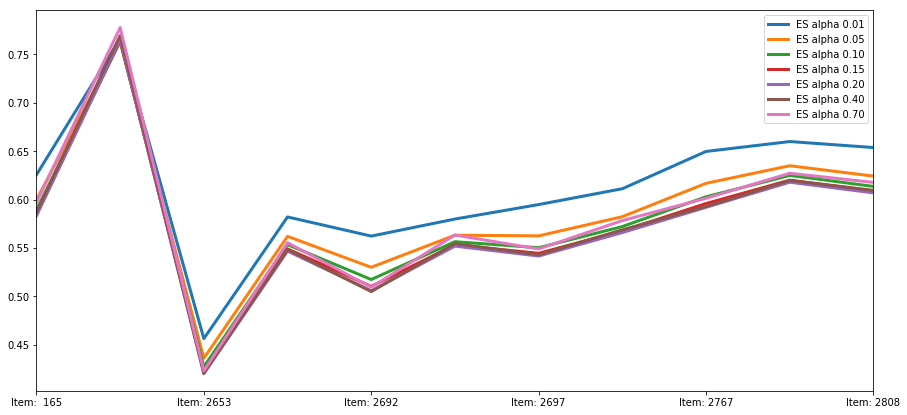

In [29]:
# compare ES parameters
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_TS.keys())

# Quality through 1500 steps
ix = range(len(ts.index))
score=[]
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    score.append(qualityMACAPE(ts.ix[ix], frc_ts.ix[ix])[0])
    QualityStr[param_cntr] = sum(score)/len(score)

QualityStr[sorted(QualityStr.columns)].plot(figsize = (15,7), linewidth=3.0)


**Task #2** 
Compare accuracy of forecast (for first 100 step of all time series from TimeSeries_Data10.csv dataset) for   NormExponentialSmoothin and InitExpnentiaSmoothing using different loss functions (MSE, MedianAE, MAPE, MACAPE). Try to explain why for some loss function NES is better then IES. (Hint: you need just plot the picture from task 1) for different loss functions and then make conclusion.)

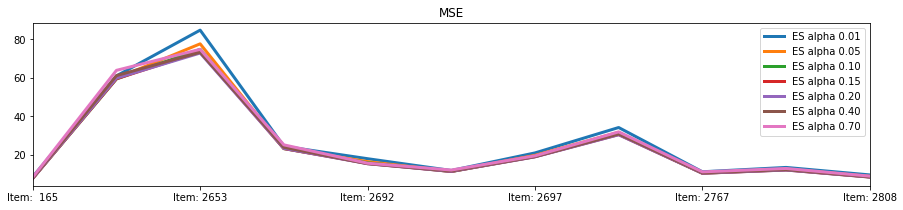

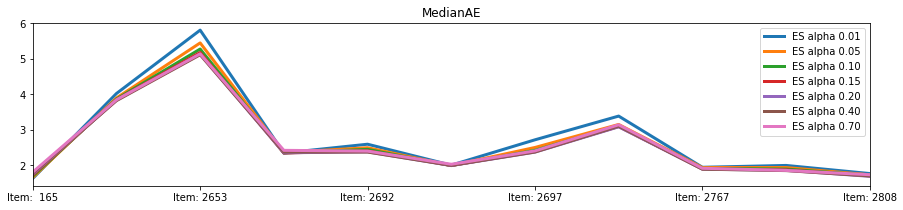

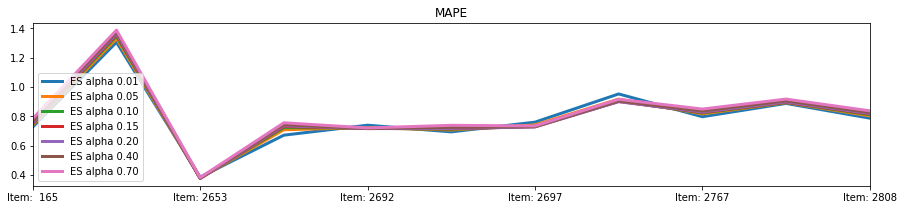

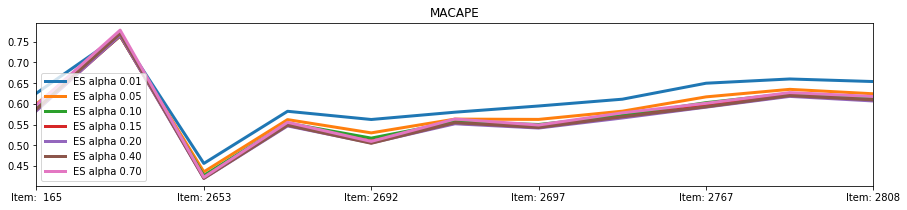

In [32]:
# compare ES parameters
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_TS.keys())

# Quality through 1500 steps
ix = range(len(ts.index))
score=[]
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    score.append(qualityMSE(ts.ix[ix], frc_ts.ix[ix])[0])
    QualityStr[param_cntr] = sum(score)/len(score)

QualityStr[sorted(QualityStr.columns)].plot(figsize = (15,3), linewidth=3.0)
plt.title('MSE')
plt.show()

QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_TS.keys())

# Quality through 1500 steps
ix = range(len(ts.index))
score=[]
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    score.append(qualityMedianAE(ts.ix[ix], frc_ts.ix[ix])[0])
    QualityStr[param_cntr] = sum(score)/len(score)

QualityStr[sorted(QualityStr.columns)].plot(figsize = (15,3), linewidth=3.0)
plt.title('MedianAE')
plt.show()

QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_TS.keys())

# Quality through 1500 steps
ix = range(len(ts.index))
score=[]
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    score.append(qualityMAPE(ts.ix[ix], frc_ts.ix[ix])[0])
    QualityStr[param_cntr] = sum(score)/len(score)

QualityStr[sorted(QualityStr.columns)].plot(figsize = (15,3), linewidth=3.0)
plt.title('MAPE')
plt.show()

QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_TS.keys())

# Quality through 1500 steps
ix = range(len(ts.index))
score=[]
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    score.append(qualityMACAPE(ts.ix[ix], frc_ts.ix[ix])[0])
    QualityStr[param_cntr] = sum(score)/len(score)

QualityStr[sorted(QualityStr.columns)].plot(figsize = (15,3), linewidth=3.0)
plt.title('MACAPE')
plt.show()

The difference of best alphas for different loss functions accurs because MAPE and MACAPE normalize errors and errors don't depend on values level